# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import LearningRateScheduler, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


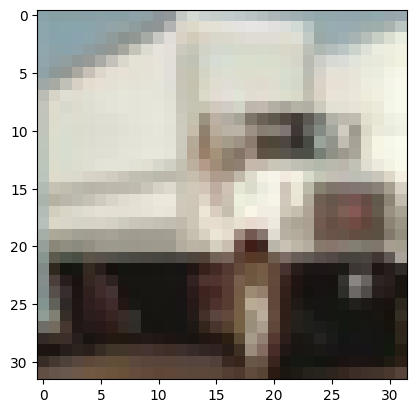

In [4]:
print(y_train[444])
plt.imshow(x_train[444])

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [6]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [8]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [9]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

c:\Users\manol\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
1563/1563 [==============================] - 22s 9ms/step - loss: 1.7211 - accuracy: 0.3725 - val_loss: 1.4456 - val_accuracy: 0.4838
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4485 - accuracy: 0.4792 - val_loss: 1.3033 - val_accuracy: 0.5414
Epoch 3/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3456 - accuracy: 0.5196 - val_loss: 1.2280 - val_accuracy: 0.5567
Epoch 4/15
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2798 - accuracy: 0.5432 - val_loss: 1.1607 - val_accuracy: 0.5796
Epoch 5/15
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2373 - accuracy: 0.5598 - val_loss: 1.1969 - val_accuracy: 0.5693
Epoch 6/15
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2116 - accuracy: 0.5711 - val_loss: 1.1532 - val_accuracy: 0.5879
Epoch 7/15
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1813 - accuracy: 0.5828 - val_loss: 1.1359 - v

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [24]:
keras.backend.clear_session()

In [8]:
model_2 = Sequential()
# Conv
model_2.add(Conv2D(64, (5, 5), padding='same', strides= (1, 1),
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

# Conv
model_2.add(Conv2D(64, (5, 5), strides= (1, 1)))
model_2.add(Activation('relu'))

# MaxPool
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# Conv
model_2.add(Conv2D(64, (5, 5), padding='same', strides= (1, 1)))
model_2.add(Activation('relu'))

# Conv
model_2.add(Conv2D(64, (5, 5), strides= (1, 1)))
model_2.add(Activation('relu'))

# MaxPool
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# Flatten
model_2.add(Flatten())

# Dense
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))

# Final Classification
model_2.add(Activation('softmax'))



In [9]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        102464    
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                        

In [10]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(learning_rate=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [12]:
hist = model_2.fit(x_train, y_train,
              batch_size=32,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 27s 15ms/step - loss: 1.5836 - accuracy: 0.4298 - val_loss: 1.1768 - val_accuracy: 0.5786
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1314 - accuracy: 0.6035 - val_loss: 1.0029 - val_accuracy: 0.6457
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9657 - accuracy: 0.6674 - val_loss: 0.9269 - val_accuracy: 0.6905
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8853 - accuracy: 0.6993 - val_loss: 0.9732 - val_accuracy: 0.6724
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8497 - accuracy: 0.7144 - val_loss: 0.9274 - val_accuracy: 0.6914
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8360 - accuracy: 0.7218 - val_loss: 0.8895 - val_accuracy: 0.7165
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8232 - accuracy: 0.7287 - val_loss: 0.8322 -

In [16]:
def plot_training_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

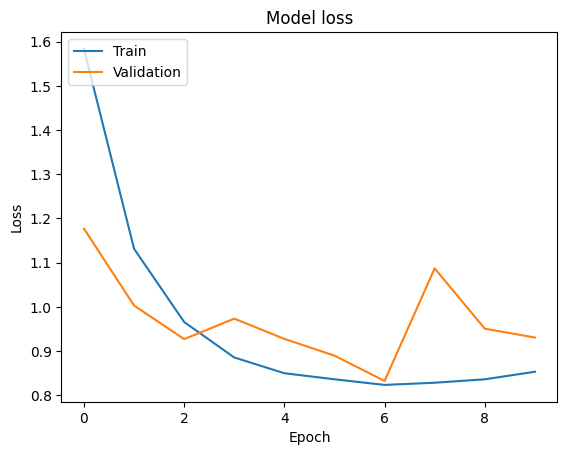

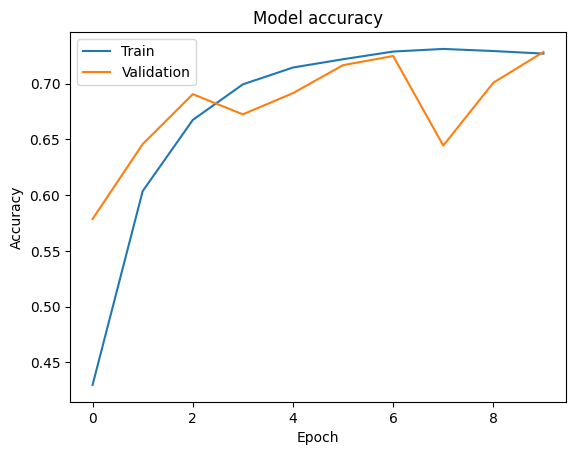

In [14]:
plot_training_history(hist)

In [12]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))



In [13]:


early_stop = EarlyStopping(monitor='val_loss', patience=2)


In [14]:
import tensorflow as tf
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [15]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

testhist = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_test), 
              callbacks=[early_stop],
              batch_size=batch_size,
             )

Epoch 1/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.6466 - accuracy: 0.4068 - precision: 0.6122 - recall: 0.1941 - val_loss: 1.2484 - val_accuracy: 0.5432 - val_precision: 0.6961 - val_recall: 0.3884
Epoch 2/50
1463/1562 [===========================>..] - ETA: 1s - loss: 1.2430 - accuracy: 0.5556 - precision: 0.7238 - recall: 0.3915

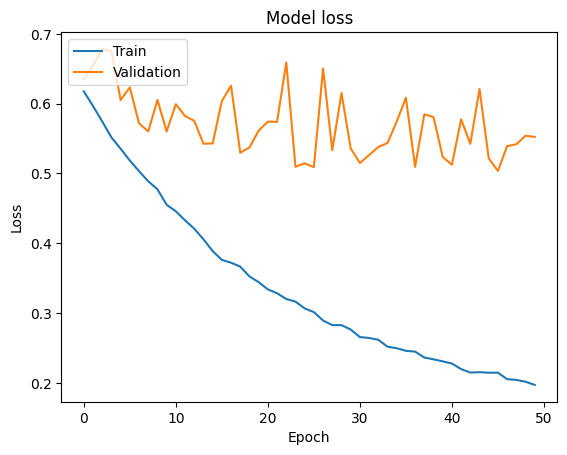

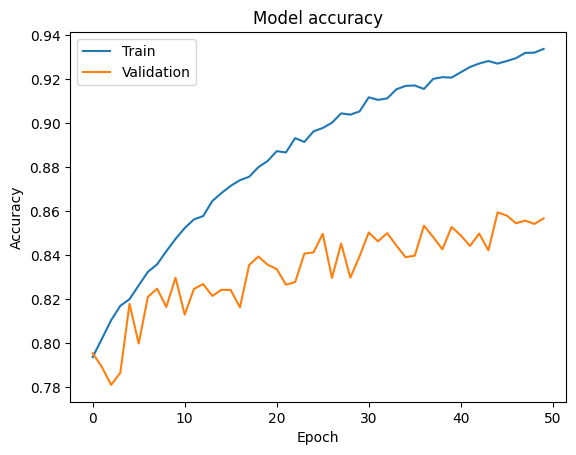

In [17]:
plot_training_history(testhist)